In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("full_dataset.txt", sep=" ")

df

,umidità,temperatura,co2,tvoc,classe
0,39,23.0,403,0,0
1,39,23.1,415,2,0
2,40,23.1,415,2,0
3,40,23.0,413,1,0
4,40,23.0,418,2,0
...,...,...,...,...,...
1078,24,41.3,5591,8407,1
1079,24,41.3,7852,13255,1
1080,24,41.3,8538,14695,1
1081,24,40.8,6211,9718,1


In [2]:
# NUMERO DI ISTANZE NEL DATASET
N, m = df.shape
print(f"Le istanze nel dataset sono {N}")

Le istanze nel dataset sono 1083


In [3]:
# CI SONO DEI MISSING VALUE?

bool_ds = df.isnull()
nan_per_column = bool_ds.sum(axis=0)

# CONTO I NAN PER OGNI COLONNA
print(nan_per_column)
total_nan = nan_per_column.sum()
print(f"In totale, ci sono {total_nan} valori NaN.")

# PRINTO LE RIGHE CON DEI NAN
df[df.isna().any(axis=1)]

umidità        0
temperatura    0
co2            0
tvoc           0
classe         0
dtype: int64
In totale, ci sono 0 valori NaN.


,umidità,temperatura,co2,tvoc,classe


0    956
1    127
Name: classe, dtype: int64
Queste sono le percentuali di ogni classe:
[88.27331486611266, 11.72668513388735].


<BarContainer object of 2 artists>

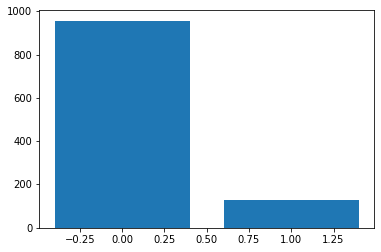

In [4]:
# IL DATASET E' BILANCIATO?
N, m = df.shape

target = df["classe"]
classes = target.value_counts()
#così in classes ho una series con da un lato le classi, dall'altro le cardinalità
print(classes)
percentages = []
labels = classes.index
data = classes.iloc
for el in classes:
  percentages.append(el/N*100)

print(f"Queste sono le percentuali di ogni classe:\n{percentages}.")
plt.bar(labels, data)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop("classe", axis=1)
Y = df.loc[:, "classe"]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

clf = SVC(kernel="linear", random_state=0, tol=1e-5, cache_size=1000, shrinking=False)
clf.fit(x_train, y_train)

t_preds = clf.predict(x_train)
preds = clf.predict(x_test)

In [6]:
print("Accuratezza nel training: {}".format(accuracy_score(y_train, t_preds)))
print("Accuratezza nel test: {}".format(accuracy_score(y_test, preds)))

Accuratezza nel training: 1.0
Accuratezza nel test: 1.0


In [7]:
print("Classification Report training")
print(classification_report(y_train, t_preds))

print("Classification Report test")
print(classification_report(y_test, preds))

Classification Report training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       638
           1       1.00      1.00      1.00        84

    accuracy                           1.00       722
   macro avg       1.00      1.00      1.00       722
weighted avg       1.00      1.00      1.00       722

Classification Report test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00        43

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.00      1.00       361



In [8]:
print("Confusion Matrix training")
print(confusion_matrix(y_train, t_preds))

print("Confusion Matrix test")
print(confusion_matrix(y_test, preds))

Confusion Matrix training
[[638   0]
 [  0  84]]
Confusion Matrix test
[[318   0]
 [  0  43]]


In [9]:
print("VETTORI DI SUPPORTO")
print(clf.support_vectors_)
print("\nI vettori di supporto sono {}".format(len(clf.support_vectors_)))

print("\n\n Dati associati ai vettori si supporto")
print(df.iloc[clf.support_])

VETTORI DI SUPPORTO
[[-1.19461974 -0.43250743 -0.78434092 -0.37814548]
 [ 0.30737772 -0.17266271  0.08300807 -0.22196843]
 [-1.58988223  1.50451689  0.70685537  0.45591435]]

I vettori di supporto sono 3


 Dati associati ai vettori si supporto
     umidità  temperatura   co2  tvoc  classe
170       40         23.1   599    30       0
329       58         23.1  1637   279       0
657       60         23.5  1509   178       0


In [10]:
print("Intercetta: {}".format(clf.intercept_))
print("Pesi: {}".format(clf.coef_))

Intercetta: [-0.77211832]
Pesi: [[-0.33296722  0.58369327  0.35757497  0.24524014]]


In [102]:
print("medie: {}".format(scaler.mean_))
print("Varianze: {}".format(scaler.var_))

medie: [  54.11172669   25.13093259 1661.25577101 1030.92982456]
Varianze: [1.60017988e+02 1.79208068e+01 2.22233383e+06 7.23209521e+06]
